In [61]:
#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%config IPCompleter.greedy=True #autocomplete jupyter

In [2]:
#load data
file_path = r"titanic_train.csv"
data = pd.read_csv(file_path)

# Sampling 

# Formatting

# Cleaning

## The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

### correcting aberrant values and outliers

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


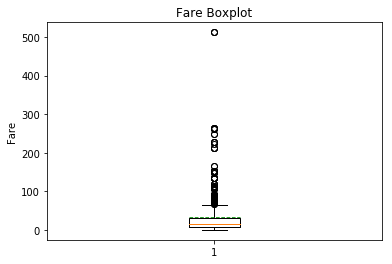

In [4]:
#box plot - Fare distibution
mask = ~np.isnan(data['Fare']).values

plt.boxplot(x=data.loc[mask,'Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare')
plt.show()

In [5]:
data.Fare.sort_values(ascending=False).head()

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: Fare, dtype: float64

In [6]:
data.Fare[data.Fare>263] = 263

C:\Users\zigi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
data.Fare.sort_values(ascending=False).head()

341    263.0
438    263.0
88     263.0
679    263.0
258    263.0
Name: Fare, dtype: float64

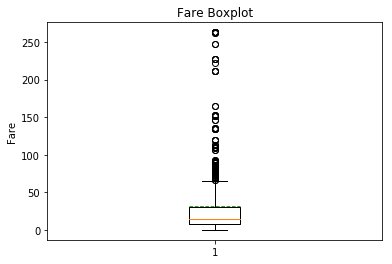

In [8]:
#box plot - Fare distibution
mask = ~np.isnan(data['Fare']).values

plt.boxplot(x=data.loc[mask,'Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare')
plt.show()

### completing missing information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
fill_values = data.Age.mean()
print("mean age " + str(fill_values))
data.Age.fillna(fill_values,inplace=True)

mean age 29.69911764705882


In [11]:
#complete Cabin with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


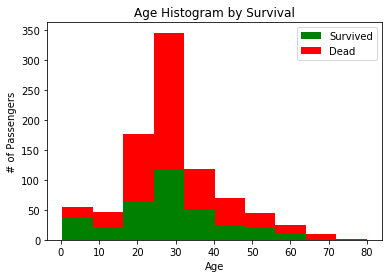

In [13]:
#hist plot - Age
plt.hist(x = [data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

### creating new features for analysis

<font color='red'>#### The Consept of Feature Engineering</font>

<font color='red'>#### Categorical Vs Continuous Features</font>

<font color='red'>#### Create Features</font>

In [26]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0

C:\Users\zigi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


C:\Users\zigi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


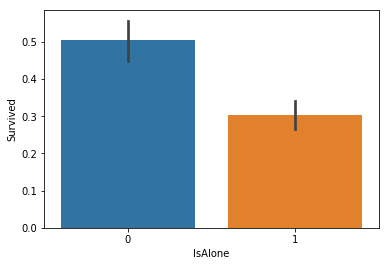

In [27]:
sns.barplot(x ='IsAlone', y ='Survived', data=data)
plt.show()

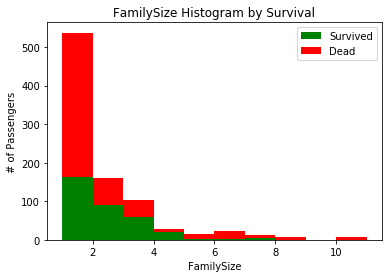

In [28]:
#hist plot - FamilySize
plt.hist(x = [data[data['Survived']==1]['FamilySize'], data[data['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('FamilySize')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

<font color='red'>#### Grouping - create bins from categorical data</font>

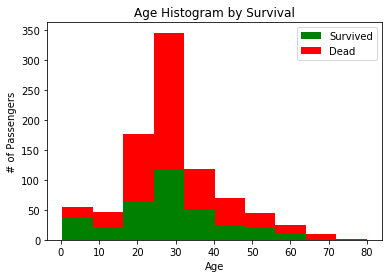

In [14]:
#hist plot - Age
plt.hist(x = [data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

In [15]:
import math

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

data['Age round'] = data.Age.apply(lambda x: roundup(x))
data.groupby('Age round')['Age round'].agg(['count'])

,count
Age round,
10,64
20,115
30,407
40,155
50,86
60,42
70,17
80,5


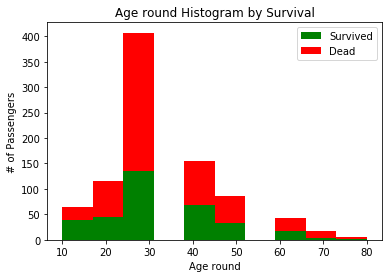

In [16]:
#hist plot - Age
plt.hist(x = [data[data['Survived']==1]['Age round'], data[data['Survived']==0]['Age round']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age round Histogram by Survival')
plt.xlabel('Age round')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

<font color='red'>#### Feature from Text</font>

In [17]:
import re
def my_regex(x):
    try:
        num = re.search(r'[0-9]+',x)
        return num.group(0)
    except:
        return 0
    return 

data['Cabin Num'] = data.Cabin.apply(lambda x : my_regex(x))    
data['Cabin Num'].value_counts().head()
print(data['Cabin Num'].dtype)
data['Cabin Num'] = data['Cabin Num'].astype("int")
print(data['Cabin Num'].dtype)

object
int32


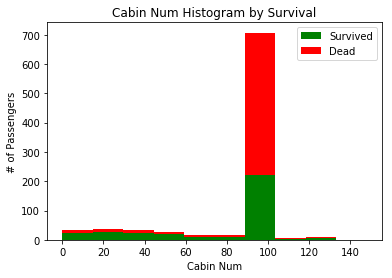

In [18]:
#hist plot - Cabin Num
plt.hist(x = [data[data['Survived']==1]['Cabin Num'], data[data['Survived']==0]['Cabin Num']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Cabin Num Histogram by Survival')
plt.xlabel('Cabin Num')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

<font color='red'>#### Scalling</font>

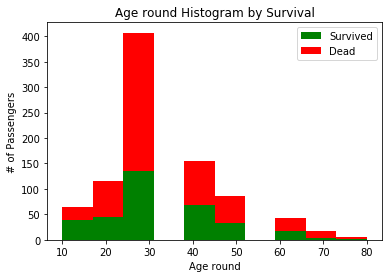

In [19]:
#hist plot - Age
plt.hist(x = [data[data['Survived']==1]['Age round'], data[data['Survived']==0]['Age round']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age round Histogram by Survival')
plt.xlabel('Age round')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

In [20]:
# Age scaled
survived_mask = (data.Survived==1).values
dead_mask = (data.Survived==0).values


age_ratio = data.loc[survived_mask,'Age round'].value_counts() / data.loc[dead_mask,'Age round'].value_counts()

age_ratio.fillna(0,inplace=True)
age_ratio

data['Age scaled'] = data['Age round'].map(age_ratio)

data[['Age round','Age scaled']].head()
index_list = list(age_ratio.sort_values(ascending=False).index.astype('O'))
index_list =(str(x) for x in index_list)

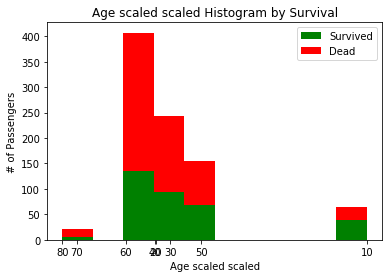

In [21]:
#hist plot - Age scaled
plt.hist(x = [data[data['Survived']==1]['Age scaled'], data[data['Survived']==0]['Age scaled']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age scaled scaled Histogram by Survival')
plt.xlabel('Age scaled scaled')
#plt.xlabel(index_list)
plt.xticks(age_ratio.values, index_list)
plt.ylabel('# of Passengers')
plt.legend()
plt.show()



In [22]:
age_ratio.sort_values(ascending=False)

10    1.461538
40    0.802326
60    0.680000
50    0.622642
20    0.619718
30    0.501845
70    0.307692
80    0.250000
Name: Age round, dtype: float64

### converting fields to the correct format for calculations and presentation

<font color='red'>####Get Dummies </font>

In [23]:
data_age_dummy = pd.get_dummies(data['Age round'])
data = data.join(data_age_dummy,lsuffix='_Age round')
data.drop('Age round',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin Num,Age scaled,10,20,30,40,50,60,70,80
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,96,0.501845,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,85,0.802326,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,96,0.501845,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,123,0.802326,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,96,0.802326,0,0,0,1,0,0,0,0


# Feature Selection - (Presentation)

In [31]:
x = data[['Cabin Num','Age scaled',10,20,30,40,50,60,70,80,'FamilySize','Parch','SibSp','Age']]

y = data.Survived

## Chi Square Test

Index(['Cabin Num', 'Age scaled', 20, 50, 60, 70, 80], dtype='object')


Text(0.5, 0.98, 'correlation between Survived and features')

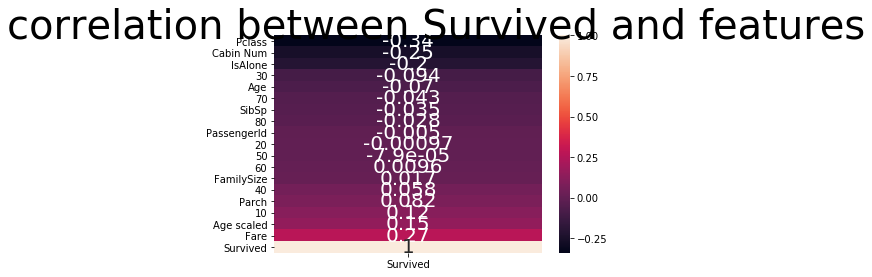

In [74]:
from sklearn.feature_selection import SelectKBest,SelectPercentile, SelectFpr,SelectFdr,GenericUnivariateSelect,chi2,f_regression
x_chi = SelectKBest(chi2, k=2).fit_transform(x, y)

#Feature Selection - Filter Methods - Univariate feature selection
# Chi squared test - SelectKBest
x_chi = SelectKBest(chi2, k=2).fit_transform(x, y)

# Chi squared test - SelectPercentile
x_chi = SelectPercentile(chi2, percentile=2).fit_transform(x, y)

# Chi squared test - SelectFpr
x_chi = SelectFpr(chi2, alpha=0.001).fit_transform(x, y)

# Chi squared test - SelectFdr
x_chi = SelectFdr(chi2, alpha=0.001).fit_transform(x, y)

# Chi squared test - GenericUnivariateSelect - mode : {‘percentile’, ‘k_best’, ‘fpr’, ‘fdr’, ‘fwe’}
transformer = GenericUnivariateSelect(chi2, 'k_best', param=5)
x_chi = transformer.fit_transform(x, y)

chosen_columns = x.columns[transformer.get_support()]

x_chi_df = x[chosen_columns]

print(x.columns)

#correlation between label and features
corr_label = data.corr()['Survived'].to_frame()
corr_label.sort_values('Survived',inplace=True)
plt.figure()
sns.heatmap(corr_label, annot=True, annot_kws={"size": 20})
plt.suptitle("correlation between Survived and features", fontsize=40)

## Coefficient Correlation

   Cabin Num  Age scaled  60  70  80
0         96    0.501845   0   0   0
1         85    0.802326   0   0   0
2         96    0.501845   0   0   0
3        123    0.802326   0   0   0
4         96    0.802326   0   0   0


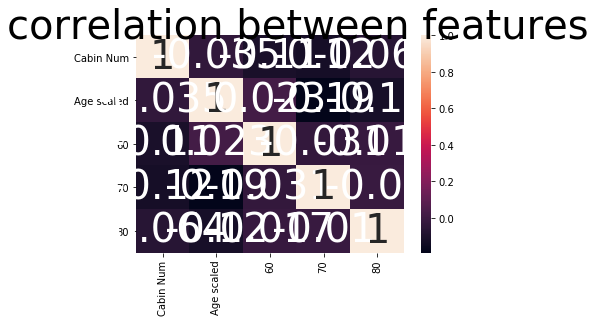

In [69]:
#correlation between features
corr = x_chi_df.corr()
plt.figure()
sns.heatmap(corr, annot=True, annot_kws={"size": 40})
plt.suptitle("correlation between features", fontsize=40)


columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = x_chi_df.columns[columns]
x_chi_df = x_chi_df[selected_columns]



print(x_chi_df.head())

# First Run of Model

In [70]:
#Create the Classifier
logreg = LogisticRegression()

#Fit the Classifier
logreg.fit(x, y)

#predict
y_pred = logreg.predict(x)

#score calculation
y_score = logreg.score(x,y)*100

C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
print("score")
print(str(y_score) + "%")

score
68.79910213243546%


In [75]:
#Create the Classifier
logreg = LogisticRegression()

#Fit the Classifier
logreg.fit(x_chi_df, y)

#predict
y_pred = logreg.predict(x_chi_df)

#score calculation
y_score = logreg.score(x_chi_df,y)*100

C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
print("score")
print(str(y_score) + "%")

score
68.91133557800224%
